# Bharath Gunasekearan
## Tabular prediction task with AutoViml
The dataset used is the heart disease dataset from Kaggle

In [ ]:
! pip install deep_autoviml

ERROR: Could not find a version that satisfies the requirement split_data_n_ways (from versions: none)
ERROR: No matching distribution found for split_data_n_ways


In [ ]:
!wget https://raw.githubusercontent.com/bharathGuna/CMPE-297-Special-Topics/main/assignment4/datasets/heart.csv -P ./data/


--2021-10-29 03:34:36--  https://raw.githubusercontent.com/bharathGuna/CMPE-297-Special-Topics/main/assignment4/datasets/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘./data/heart.csv.1’

heart.csv.1         100%[===================>]  10.77K  --.-KB/s    in 0s      

2021-10-29 03:34:36 (93.0 MB/s) - ‘./data/heart.csv.1’ saved [11024/11024]



In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:

trainpath = "/content/data/heart.csv"
heart_disease_data = pd.read_csv(trainpath, encoding='ISO-8859-1')
heart_disease_data.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
target = 'target'
heart_disease_data[target].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:

train_X, test_X, train_y, test_y = train_test_split(heart_disease_data.drop(columns=[target]), heart_disease_data[target], 
                                                    train_size=0.90,
                                                    test_size=0.10,
                                                    random_state=122)

train_X['target'] = train_y
train_X.to_csv('/content/data/heart_disease_train.csv')
test_X['target'] = test_y
test_X.to_csv('/content/data/heart_disease_test.csv')

Deep AutoVIML

In [ ]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "heart_disease_classification"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Mo

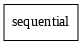

Model plot saved in file: deep_autoviml_heart_disease_classification_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.088, 1: 1.0}
    original datasize = 273, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 500
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitt

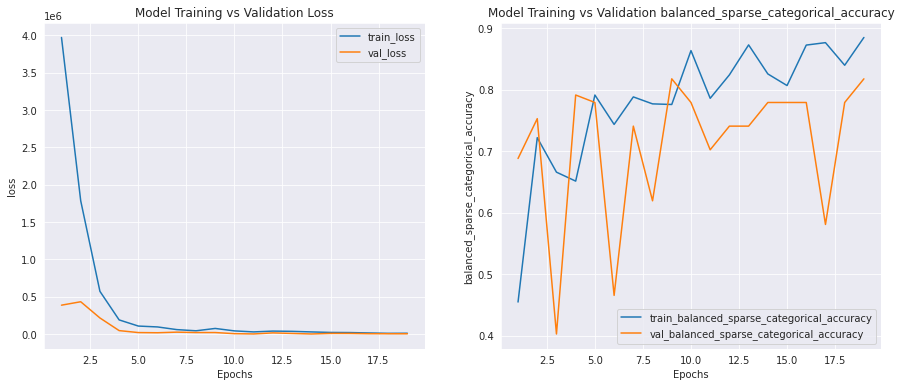

Time taken to train model (in mins) = 1
    Stopped epoch = 9
Held out data actuals shape: (32,)
    samples from label: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

Held out predictions shape:(32,)
    Sample predictions: [0 0 1 0 0 0 1 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: target
#################################################################


    Accuracy          = 56.2%
    Balanced Accuracy = 61.9%
    Precision         = 85.7%
    Average Precision = 66.9%
    Recall            = 31.6%
    F1 Score          = 46.2%
    ROC AUC           = 22.5%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.0077461954
    set learning rate using best model: 0.0077461954
    max epochs for training = 9

Model not being saved since save_model_flag set to False...
6273

Saving vocab dictionary using pickle in heart_disease_classification/auto/model_2021_10_29-03_43_28/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in heart_disease_classification/auto/model_2021_10_29-03_43_28/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in heart_disease_classification/auto/model_2021_10_29-03_43_28/artifacts/var_df.pickle...will take time...
    Saved pickle file in heart_disease_classification/auto

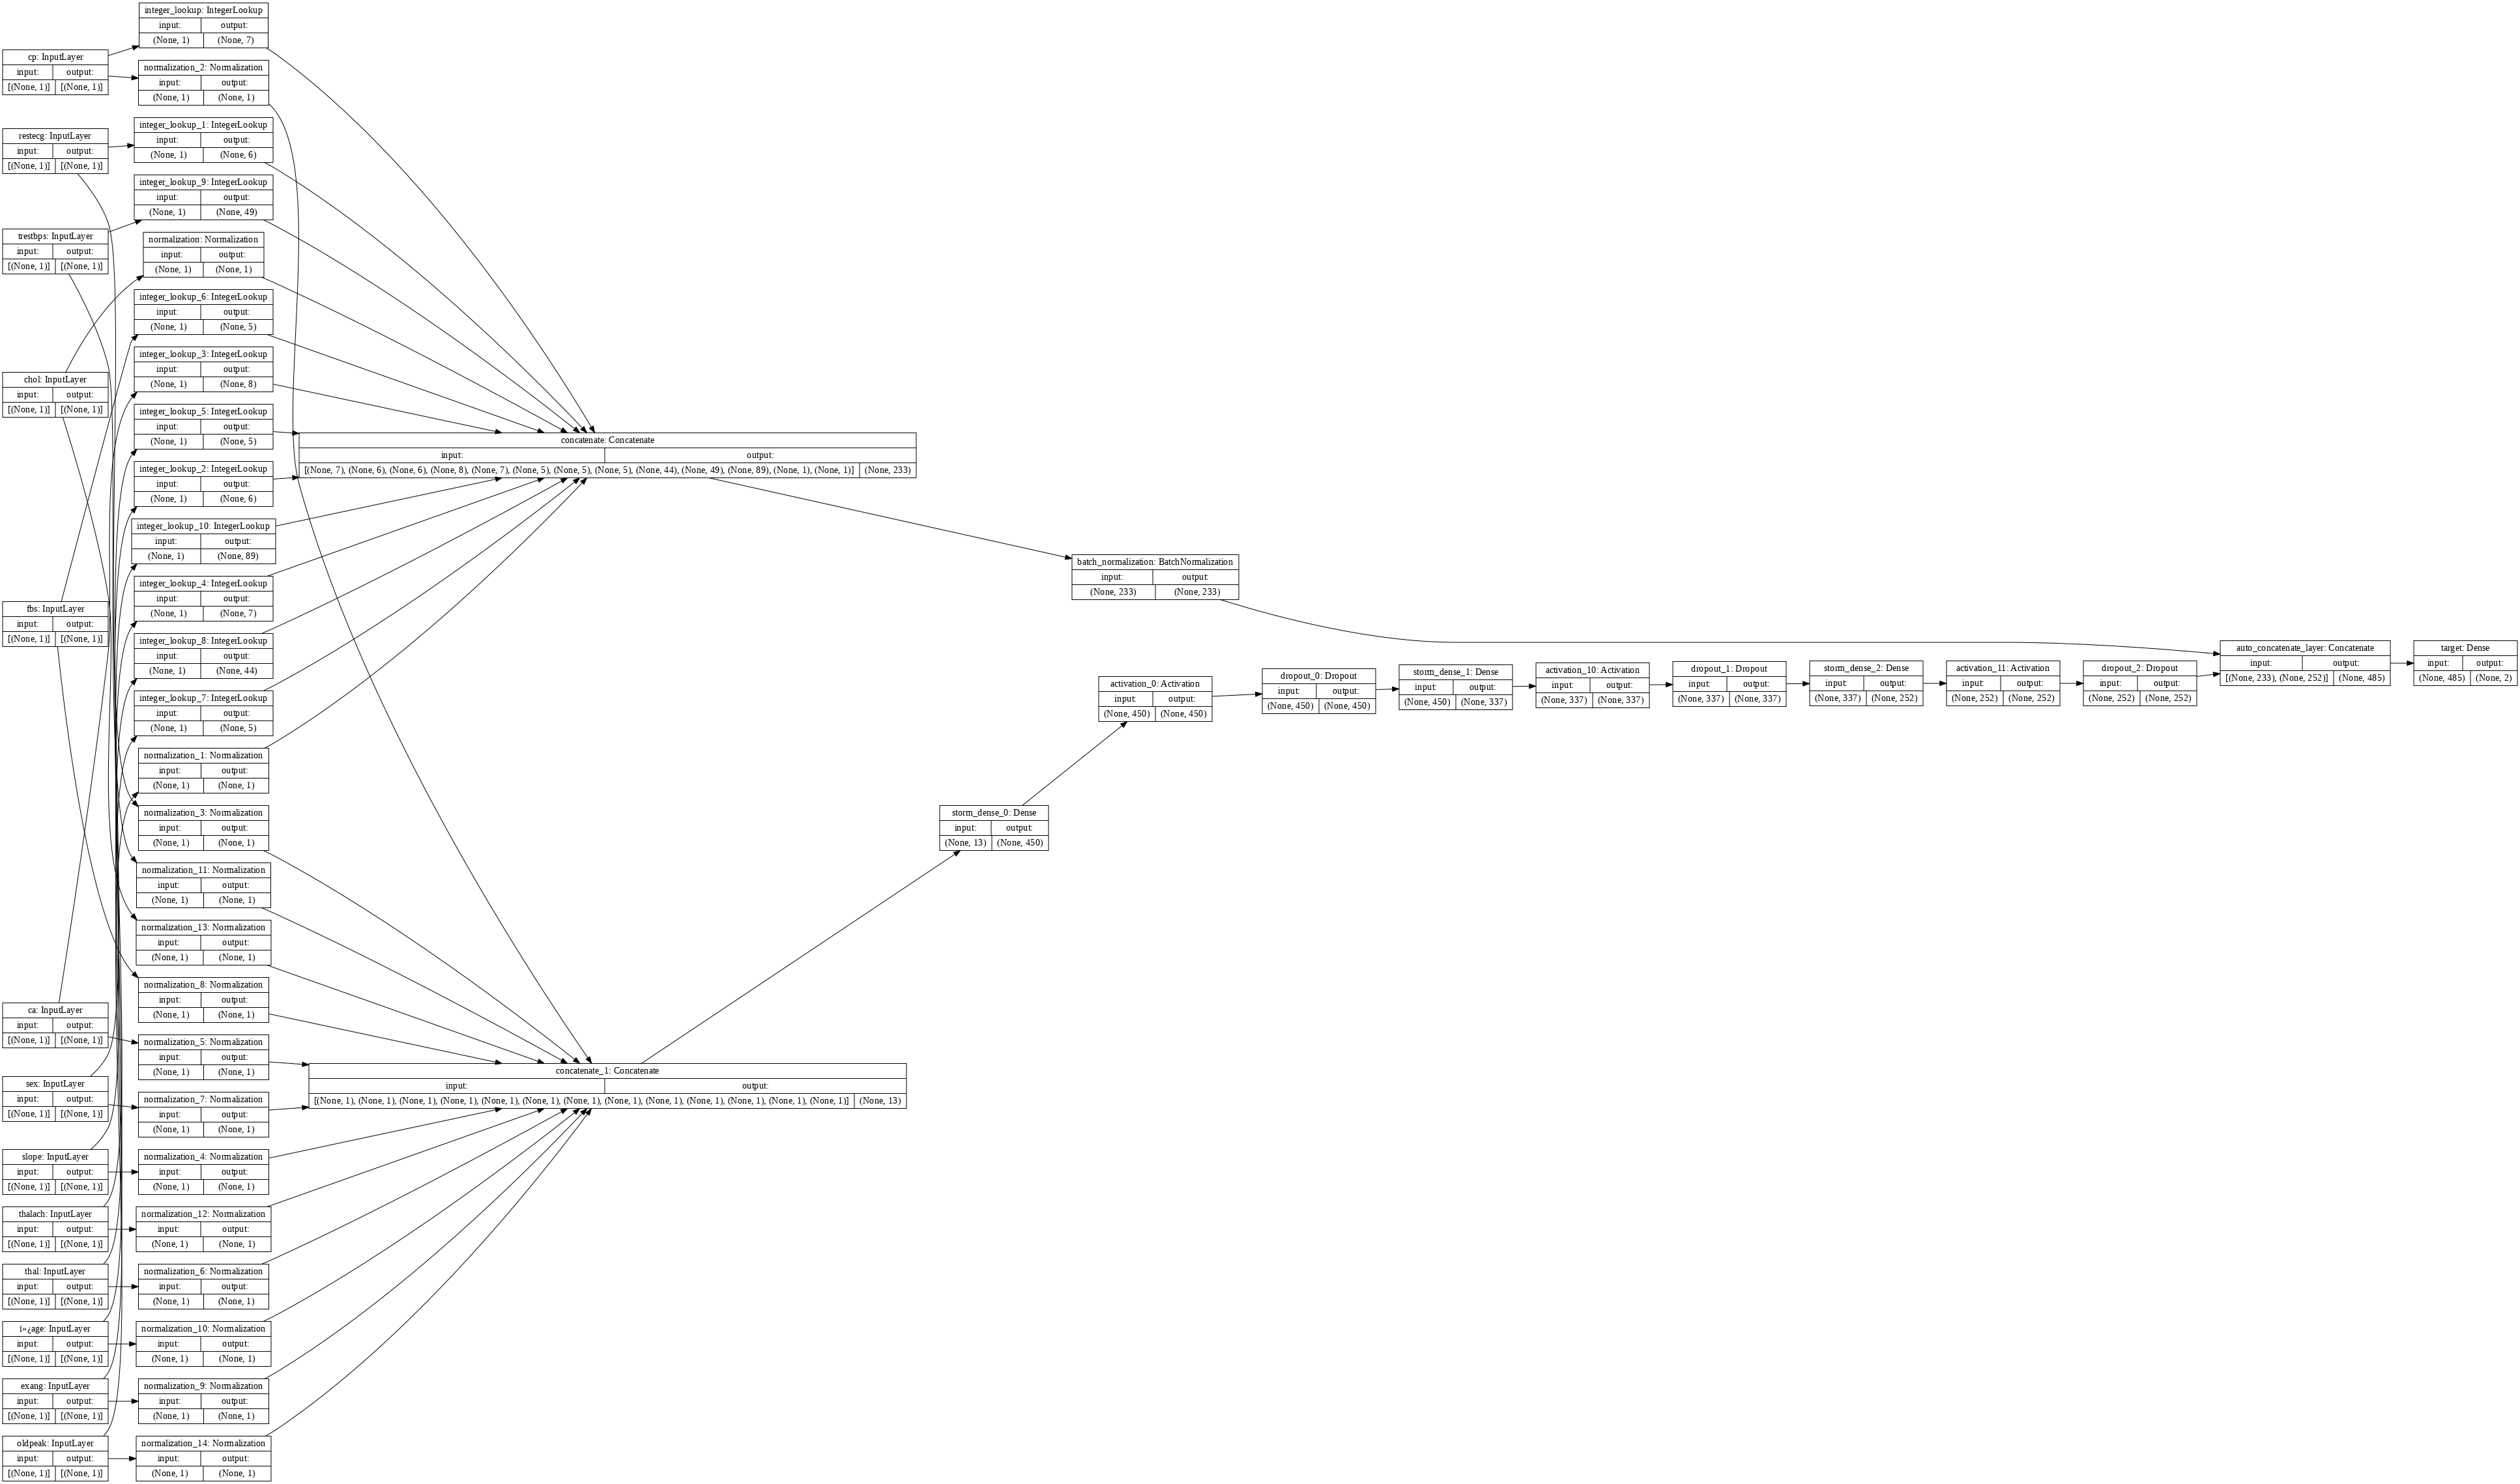

Model plot saved in file: deep_autoviml_heart_disease_classification_auto_model_after.png


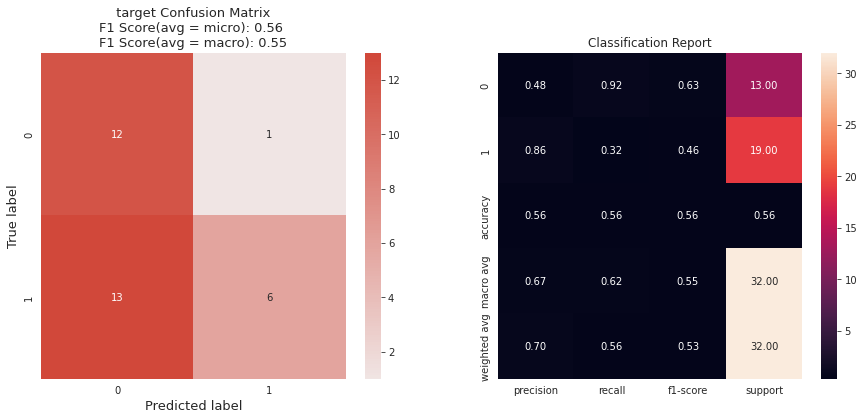

In [ ]:
model, cat_vocab_dict = deepauto.fit('/content/data/heart_disease_train.csv', target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=2)

# Inference

In [ ]:

testpath = '/content/data/heart_disease_test.csv'
predictions = deepauto.predict(model, project_name=project_name, test_dataset=testpath,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f6d824c6510> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f6d824c6510> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 31
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    15 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 0
Distribution of integer columns in datatset:
    number of binary = 5, cats

In [ ]:
test = pd.read_csv(testpath)
print(classification_report(test[target].values,predictions[1]))

              precision    recall  f1-score   support

           0       0.50      0.77      0.61        13
           1       0.73      0.44      0.55        18

    accuracy                           0.58        31
   macro avg       0.61      0.61      0.58        31
weighted avg       0.63      0.58      0.57        31

